 ###  import librrary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 ###  read file

In [3]:
pathcsv = './data_clean.csv'

 ###  select data

In [4]:
columns = [
# 'temp_Celsius',
'time_dayofweek',
# 'time_year',
# 'time_month',
# 'time_dayofmonth',
'time_hour',
# 'rain_1h',
# 'snow_1h',
# 'clouds_all',
'traffic_volume'
]

### function read data

In [5]:
def redData(_path):
    # read selected data without commant
    data = pd.read_csv(_path,comment='#',usecols=columns, sep=',')  
    # rescaling data
    data = (data - data.min()) / (data.max()-data.min())
    # Add column number 0 that contains Ones for Theta 0
    data.insert(0, 'Ones', 1)  
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)
    
    return x,y,data


### function plot theta + data

In [6]:
def plot(x_name,y_name):
    x = np.linspace(data[x_name].min(), data[x_name].max(), 100)
    f = theta[0, 0] + (theta[0, 1] * x)
    
    # draw the line
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(x, f, 'r', label='Regression')
    ax.scatter(data[x_name], data[y_name],s=10, c='b', marker='.', label='Traning Data')
    ax.legend(loc=2)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title('Regression : '+x_name+' vs '+y_name )

### Cost function

In [7]:
def computeCost(x, y, theta):
    z = np.power(((x * theta.T) - y), 2)
    return np.sum(z) / (2 * len(x))

# Regression Problem Linear

### gradientDescent function

In [8]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(x, y, theta)
    return theta, cost


### run

theta 0: [[0. 0. 0.]]
alpha: 0.001
iters: 2000
theta new =  [[0.28604279 0.09711816 0.17769252]]
------------------------------
cost of gradientDescent : 0.03568744093167156


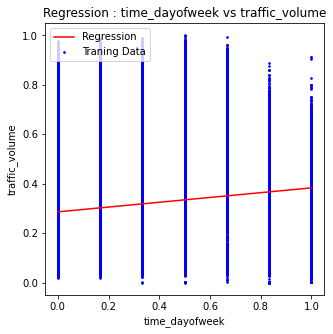

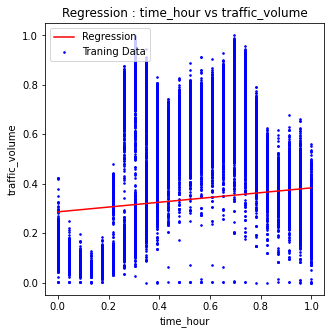

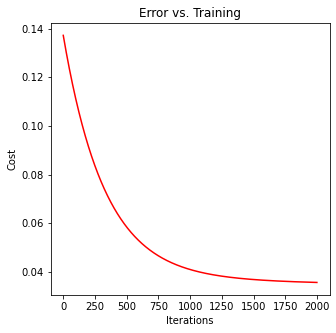

In [9]:
X,Y,data = redData(pathcsv)

# calcule theta by gradientDescent
theta = np.matrix(np.zeros(X.shape[1]))
print('theta 0:',theta)
alpha = 0.001
print('alpha:',alpha)
iters = 2000
print('iters:',iters)
theta, costs = gradientDescent(X, Y, theta, alpha, iters)
print('theta new = ' , theta)

plot('time_dayofweek','traffic_volume')
plot('time_hour','traffic_volume')

# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), costs, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training')

print('------------------------------')
cost = computeCost(X, Y, theta)
print('cost of gradientDescent :',cost)


# normal Equation

### normal Equation

In [10]:
def normalEquation(X,Y):
    XT=X.T
    XTX=XT@X
    inv=np.linalg.pinv(XTX)
    theta=(inv@XT)@Y
    return theta

theta of normal Equation : [[ 0.35027653 -0.12085222  0.31812174]]
------------------------------
cost of normal Equation : 0.031800567745850945


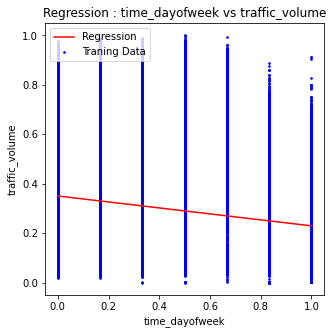

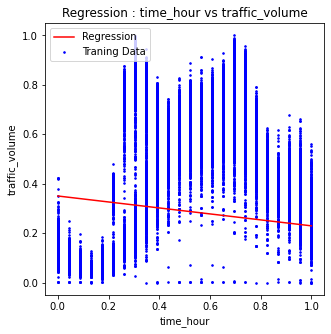

In [11]:
X,Y,data = redData(pathcsv)
theta = normalEquation(X,Y).T
print('theta of normal Equation :',theta)
plot('time_dayofweek','traffic_volume')
plot('time_hour','traffic_volume')
print('------------------------------')
cost = computeCost(X, Y, theta)
print('cost of normal Equation :',cost)